<a href="https://colab.research.google.com/github/kchitrapu9000/ML_assignment_50545734/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


X_train shape: (1279, 11)
y_train shape: (1279,)
X_test shape: (320, 11)
y_test shape: (320,)
weights :  [ 3.31563052e+00 -1.73453010e-01 -1.38432927e-03 -3.88894065e-03
 -3.87829375e-02 -2.74001615e-02  1.96004379e-02 -2.66486764e-02
  1.23642893e-01 -1.06319509e-02  7.62509957e-02 -4.78517336e-03]
Mean Squared Error (MSE) on Testing Data: 0.007103892687752722


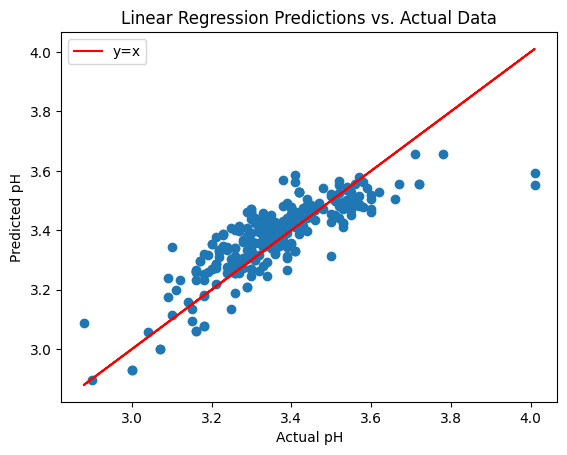

In [21]:
#1 Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv')


X = data.drop(columns=['pH'])
y = data['pH']

X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

w = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

print("weights : ", w )

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

y_pred = X_test_b.dot(w)

mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE) on Testing Data:", mse)

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, y_test, color='red', label='y=x')
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Linear Regression Predictions vs. Actual Data")
plt.legend()
plt.show()

X_train shape: (275, 4)
y_train shape: (275,)
X_test shape: (69, 4)
y_test shape: (69,)
Accuracy: 0.391304347826087
Accuracy Percentage: 39.130434782608695
Correct Predictions: 27
Incorrect Predictions: 42
loss value:  0.6086956521739131


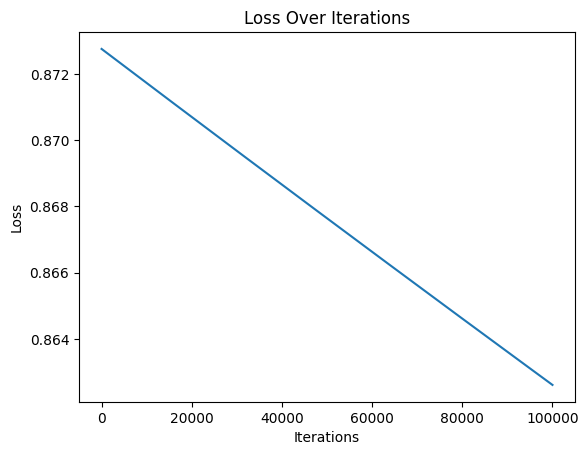

Accuracy: 0.9420289855072463
Accuracy Percentage: 94.20289855072464
Correct Predictions: 65
Incorrect Predictions: 4
loss value:  0.057971014492753624


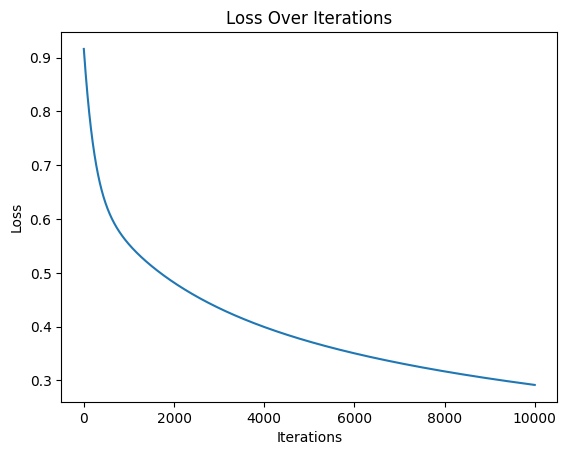

Accuracy: 0.9420289855072463
Accuracy Percentage: 94.20289855072464
Correct Predictions: 65
Incorrect Predictions: 4
loss value:  0.057971014492753624


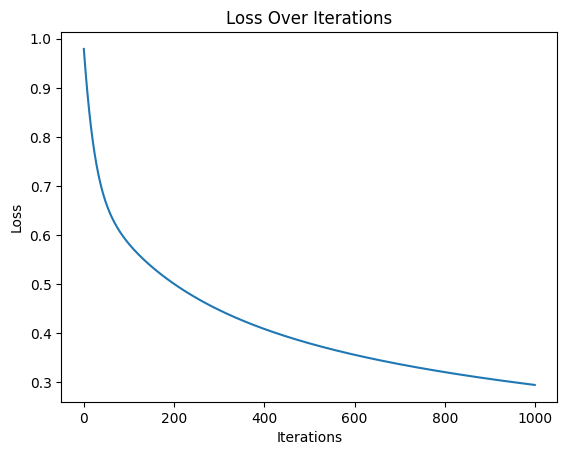

In [22]:
#2 Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, h, y):
        m = len(y)
        return (1 / m) * np.dot(X.T, (h - y))

    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, X.shape[1])
        self.loss = []

        for _ in range(self.iterations):
            z = np.dot(X, self.weights)
            h = self.sigmoid(z)
            gradient = self.gradient_descent(X, h, y)
            self.weights -= self.learning_rate * gradient
            cost = self.cost(h, y)
            self.loss.append(cost)

    def predict(self, X):
        z = np.dot(X, self.weights)
        predicted_probabilities = self.sigmoid(z)
        predictions = [1 if p >= 0.5 else 0 for p in predicted_probabilities]
        return predictions

data = pd.read_csv('penguins.csv')


data.fillna(data.mode().iloc[0], inplace=True)

data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes
data['island'] = (data['species'] == 'Adelie')
#data['species'] = data['species'].astype('category').cat.codes

for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

data = data.sample(frac=1.0, random_state=42)

X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = data['island'].values

split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


different_setups ={
    1e-6:100000,
    0.01:10000,
    0.1: 1000
}

for learning_rate, iterations in different_setups.items():
  model = LogitRegression(learning_rate, iterations)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = np.mean(y_pred == y_test)
  print("Accuracy:", accuracy)
  print("Accuracy Percentage:", accuracy * 100)

  threshold = 0.1
  correct_predictions = np.sum(np.abs(y_pred - y_test) < threshold)
  incorrect_predictions = len(y_test) - correct_predictions


  print("Correct Predictions:", correct_predictions)
  print("Incorrect Predictions:", incorrect_predictions)
  print("loss value: ", ((y_test - y_pred) ** 2).mean())
  plt.plot(range(len(model.loss)), model.loss)
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.title("Loss Over Iterations")
  plt.show()
